In [32]:
# Import library
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline
# Load data
data = pd.read_excel('../data/data.xlsx')
#data = pd.read_csv('../data/SMSSpamCollection')
# Rename names columns 
data.columns = ['label', 'messages']

In [33]:
data.describe()

,label,messages
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


Create another column with the length of the messages

In [34]:
data['length'] = data['messages'].apply(len)
data.sort_values(by='length', ascending=False).head(10)

,label,messages,length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2849,ham,Sad story of a Man - Last week was my b'day. M...,588
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2380,ham,"Good evening Sir, hope you are having a nice d...",482
3017,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1513,ham,"Hey sweet, I was wondering when you had a mome...",458
2370,ham,A Boy loved a gal. He propsd bt she didnt mind...,446


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

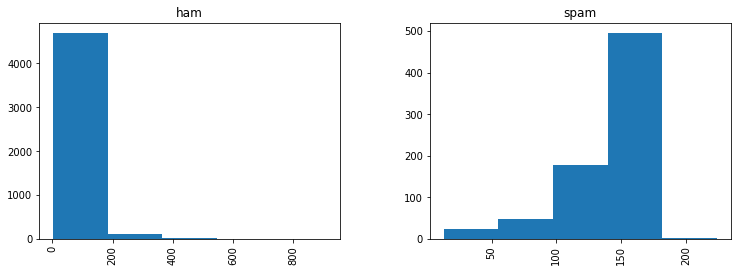

In [35]:
data.hist(column='length', by='label', figsize=(12,4), bins=5)

From the above, the spam messages then to have characters

## Tokenization

In [36]:
# remove punctuations
from nltk.corpus import stopwords

# remove any stop words for remove_punch, but first we should transform this into the list

def transform_message(message):
    message_not_punc = [] # messages without punctuation
    i = 0
    for punctuation in message:
        if punctuation not in string.punctuation:
            message_not_punc.append(punctuation)
    # join the words to form the string
    message_not_punc = ''.join(message_not_punc)
    
    # remove any stopwords for the message_not_punc, but first we should transform this into a list
    message_clean = list(message_not_punc.split(" "))
    while i <= len(message_clean):
        for message in message_clean:
            if message.lower() in stopwords.words('english'):
                message_clean.remove(message)
        i += 1 
    return message_clean
                        
        

In [37]:
# apply the above function
data['messages'].head(5).apply(transform_message)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [42]:
test_data = data.loc[:5]

In [54]:
test_data['messages'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [17]:
#import nltk
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/onwunalu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## VectorizationConvert a collection of text documents to a matrix of token counts.

Convert a collection of text documents to a matrix of token counts.
This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

In [38]:
# From the above, we have messages as list of tokens. COnvert the messages into a vector
from sklearn.feature_extraction.text import CountVectorizer
# countvectorizer convers a collection of documents to an array of token counts

## Vectorization using a test_data

In [45]:
vectorizer = CountVectorizer(analyzer=transform_message)
X = vectorizer.fit_transform(test_data['messages'])

In [46]:
vectorizer.get_feature_names_out()

array(['08452810075over18s', '2', '2005', '21st', '3', '87121',
       'Available', 'Cine', 'Cup', 'FA', 'Free', 'FreeMsg', 'Go', 'Hey',
       'Id', 'Joking', 'May', 'Nah', 'Ok', 'Tb', 'Text', 'U', 'XxX',
       'already', 'amore', 'apply', 'around', 'back', 'buffet', 'bugis',
       'c', 'chgs', 'comp', 'crazy', 'darling', 'dont', 'dun', 'e',
       'early', 'entry', 'final', 'fun', 'goes', 'got', 'great', 'hor',
       'jurong', 'la', 'lar', 'like', 'lives', 'n', 'ok', 'oni', 'point',
       'questionstd', 'rateTCs', 'rcv', 'receive', 'say', 'send', 'std',
       'still', 'think', 'though', 'tkts', 'txt', 'u', 'usf', 'wat',
       'weeks', 'wif', 'win', 'wkly', 'word', 'world', 'Â£150'],
      dtype=object)

In [52]:
X.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0

In [55]:
# Vectorization
vectorization = CountVectorizer(analyzer = transform_message )
X_transform = vectorization.fit_transform(data['messages'])


In [56]:
print(X_transform)

  (0, 2061)	1
  (0, 7556)	1
  (0, 8918)	1
  (0, 5770)	1
  (0, 1111)	1
  (0, 5219)	1
  (0, 8337)	1
  (0, 6938)	1
  (0, 11164)	1
  (0, 7669)	1
  (0, 6218)	1
  (0, 5218)	1
  (0, 1484)	1
  (0, 6907)	1
  (0, 4654)	1
  (0, 10966)	1
  (1, 3065)	1
  (1, 7702)	1
  (1, 2452)	1
  (1, 11073)	1
  (1, 10699)	1
  (1, 8591)	1
  (2, 1942)	1
  (2, 6332)	2
  (2, 424)	1
  :	:
  (5570, 11417)	1
  (5570, 6692)	1
  (5570, 6355)	1
  (5571, 0)	1
  (5571, 8253)	1
  (5571, 3229)	1
  (5571, 3722)	1
  (5571, 10200)	1
  (5572, 7801)	1
  (5572, 11007)	1
  (5572, 8421)	1
  (5572, 10788)	1
  (5572, 6700)	1
  (5572, 9916)	1
  (5572, 6283)	1
  (5572, 6800)	1
  (5572, 5252)	1
  (5572, 7395)	1
  (5572, 6985)	1
  (5572, 7288)	1
  (5572, 4509)	1
  (5572, 5056)	1
  (5573, 8349)	1
  (5573, 10649)	1
  (5573, 3432)	1


## TF-IDF

(notes from http://www.tfidf.com/#:~:text=TF(t)%20%3D%20(Number,terms%20are%20considered%20equally%20important.&text=IDF(t)%20%3D%20log_e(,with%20term%20t%20in%20it).


How to Compute TF-IDF ?
TF-IDF is composed by two terms: the first term is the Term Frequency (TF) and the second is the Inverse Document Frequency (IDF):

Term Frequency (TF): Which measures how frequently a term occurs in a document, that is, the number of times a word appears in a document, divided by the total number of words in that document:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

Inverse Document Frequency (IDF): Measures how important a term is, computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [61]:
tfidf_transformer = TfidfTransformer().fit(X_transform)

In [62]:
# transform the entire bag-of-words corpus to tfidf corpus
X_tfidf = tfidf_transformer.transform(X_transform)
print(X_tfidf.shape)


(5574, 11426)


In [74]:
print(X_tfidf[1][0])

  (0, 11073)	0.4006170106480546
  (0, 10699)	0.20637541507921356
  (0, 8591)	0.5043365091357772
  (0, 7702)	0.37674276971445636
  (0, 3065)	0.29120672453799534
  (0, 2452)	0.5619816842520484


## Classifcation Model

The features are not represented as a vectors and we can now use a classification model

First, we split the data into train and test data. We take 70 % (0.70) training data and 30% (0.30) test data and the we fit the model using SVC:

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['messages'], test_size=0.30, random_state = 50)    


### Build Model

In [84]:
clf = SVC(kernel='linear').fit(X_train, y_train)

### Test Model
To test the model we use X_test previously calculated:

In [85]:
predictions = clf.predict(X_test)
print('predicted', predictions)

predicted ["Joy's father is John. Then John is the ____ of Joy's father. If u ans ths you hav  &lt;#&gt;  IQ. Tis s IAS question try to answer."
 'She doesnt need any test.'
 'Smile in Pleasure Smile in Pain Smile when trouble pours like Rain Smile when sum1 Hurts U Smile becoz SOMEONE still Loves to see u Smiling!!'
 ... 'whatever, im pretty pissed off.'
 'Someone has contacted our dating service and entered your phone because they fancy you! To find out who it is call from a landline 09111032124 . PoBox12n146tf150p'
 'JADE ITS PAUL. Y DIDNÂ’T U TXT ME? DO U REMEMBER ME FROM BARMED? I WANT 2 TALK 2 U! TXT ME']


In [86]:
predictions

array(["Joy's father is John. Then John is the ____ of Joy's father. If u ans ths you hav  &lt;#&gt;  IQ. Tis s IAS question try to answer.",
       'She doesnt need any test.',
       'Smile in Pleasure Smile in Pain Smile when trouble pours like Rain Smile when sum1 Hurts U Smile becoz SOMEONE still Loves to see u Smiling!!',
       ..., 'whatever, im pretty pissed off.',
       'Someone has contacted our dating service and entered your phone because they fancy you! To find out who it is call from a landline 09111032124 . PoBox12n146tf150p',
       'JADE ITS PAUL. Y DIDNÂ’T U TXT ME? DO U REMEMBER ME FROM BARMED? I WANT 2 TALK 2 U! TXT ME'],
      dtype=object)

### Model Reliability

In [87]:
from sklearn.metrics import classification_report
print (classification_report(y_test, predictions))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                precision    recall  f1-score   support

                                               

/home/onwunalu/.pyenv/versions/spam-detection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onwunalu/.pyenv/versions/spam-detection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onwunalu/.pyenv/versions/spam-detection/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [88]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Vectorization
vectorization = CountVectorizer(analyzer = transform_message )
X = vectorization.fit(data['messages'])

X_transform = X.transform([data['messages']])
# TF-IDF
tfidf_transformer = TfidfTransformer().fit(X_transform)
X_tfidf = tfidf_transformer.transform(X_transform)
print(X_tfidf.shape)
# Classification Model

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['messages'], test_size=0.30, random_state = 50)    
clf = SVC(kernel='linear').fit(X_train, y_train)
# Test model

predictions = clf.predict(X_test)
print('predicted', predictions)
# Is our model reliable?

print (classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))